In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario3_EYDC-9K"

In [2]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [3]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [5]:
# checking the size of dataset
x.shape

(9590, 41505)

In [6]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [7]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [9]:
# impute nan to zero
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [10]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [11]:

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
# model fitting
rf = RandomForestRegressor(random_state = 84)
rf.fit(train_X, train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)



StartTime : 2020-09-15 12:54:39.908207
EndTime : 2020-09-15 20:54:48.306865


In [12]:
import matplotlib
from matplotlib import pyplot as plt

In [13]:
predicted_classes = rf.predict(test_X)
predicted_value = predicted_classes

In [14]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K"
c.to_csv(workdir + '//200915_EYDC9K_RF_pred_and_val_result.csv', index=False)


In [15]:
# result table
c.head()

,Predicted,Test
0,-4.526973,-4.667942
1,2.079435,2.079442
2,1.992325,2.079442
3,2.072284,2.079442
4,2.045530,2.079442


In [16]:
# the length of result table
predicted_value.shape

(959,)

In [17]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(rf, workdir + '//200915_EYDC9K_RF_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K//200915_EYDC9K_RF_model.pkl']

In [18]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EYDC9K_RF_model.pkl') 
regr_from_joblib.predict(test_X)

array([-4.52697327e+00,  2.07943512e+00,  1.99232510e+00,  2.07228387e+00,
        2.04552966e+00, -2.41431473e+00,  9.77753547e-01,  3.43386907e-01,
       -3.19115474e+00,  1.98336379e+00, -7.32717117e-02, -7.31836669e-01,
        2.06317390e+00,  1.81525651e+00,  1.06623291e+00,  1.88377549e+00,
       -7.16260694e-01, -2.21562000e+00,  1.90448871e+00,  2.02775246e+00,
        1.49562909e+00,  1.90492824e+00, -2.46057577e+00, -1.82449782e+00,
        1.86826661e+00,  1.16502316e+00,  2.04098176e+00,  1.80813317e+00,
        1.03582386e+00,  1.82098397e+00, -1.02406303e+00,  9.69664863e-01,
       -2.11919510e+00,  1.12887292e+00,  1.48258616e+00,  1.63199515e+00,
        1.60014271e+00, -1.08350001e+00,  1.04957069e+00,  1.80783720e+00,
        1.82417694e+00,  2.07943493e+00,  5.29686964e-01,  1.43772217e+00,
        1.08892504e+00,  1.41337237e+00,  2.07703732e+00,  8.72461031e-01,
        2.02767140e+00,  2.05342921e+00, -2.66215630e+00,  2.00629008e+00,
        1.91685032e+00,  

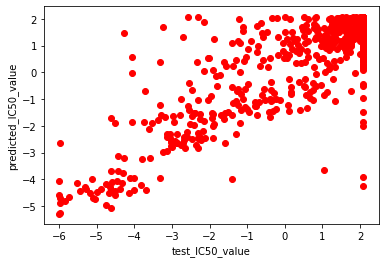

In [19]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EYDC9K_RF_plot.png')

In [20]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7557960767490615


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7535707397024287, intercept=0.17916079162236231, rvalue=0.8696633005453456, pvalue=1.1751337533944766e-295, stderr=0.013827127767194905)

In [22]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9750944140696027
